In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

########################SET folder to path of code directory in the project folder#####################
## SET PATH to code directory in the project folder
code_path = "C:\\Users\\evdoxiataka\\codes\\effi_user_study_1\\code\\"
import sys  
sys.path.insert(1, code_path)

########################SET folder to project directory path#####################
folder= "C:\\Users\\evdoxiataka\\codes\\effi_user_study_1\\"

from utils.data_loading import get_all_participants_logs, get_all_participants_feedback

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Data Loading

In [2]:
## LOAD FEEDBACK
prolific_export_filePath = folder+"data\\collected_data\\prolific_export_demographics.csv"
interaction_logs_filePath = folder+"data\\collected_data\\LOGS\\"
logs_df = get_all_participants_logs(prolific_export_filePath, interaction_logs_filePath)
feedback_df = get_all_participants_feedback(logs_df)
# logs_df.to_csv("Feedback_final.csv")

## LOAD APPLICATIONS SHOWN TO PARTICIPANTS
applications_df = pd.read_csv(folder+"data\\processed_data\\Applications_Converted.csv")
ft_weight_dict = {}

for i in range(0,49):
    ft_weight_dict.update({applications_df["ft_name_"+ str(i)][0]:applications_df["ft_weight_"+ str(i)][0]})

df = applications_df[["Application_id","Predicted_decision", "Prediction_Confidence_Accepted" ]]
df = df.T
df.rename(columns=df.iloc[0],inplace =True)

# Analysis of Participants' Interaction with the UI components

## Average number of clicks that a user did on a function with std

In [3]:
function_group = logs_df.groupby(by = ["ID","Function"])

function_count = function_group.size().unstack(fill_value=0).stack()

parti_list = []
function_list = []
function_count_list = function_count.tolist()

# print(len(function_count_list))

for i in range(0,len(function_count.index)):
    parti_list.append(function_count.index[i][0])
    function_list.append(function_count.index[i][1])

parti_func_df = pd.DataFrame()

parti_func_df["Participant"] = parti_list
parti_func_df["Function"] = function_list
parti_func_df["Participant_Function_Count"] = function_count_list
parti_func_df

,Participant,Function,Participant_Function_Count
0,5952a5175071bb0001ce96c7,Applications_Prediction_Confidence,2
1,5952a5175071bb0001ce96c7,Click on Feature Combination Button,2
2,5952a5175071bb0001ce96c7,Clicked-on-Causal-Graph-Node,0
3,5952a5175071bb0001ce96c7,apply_refine_search,8
4,5952a5175071bb0001ce96c7,select_applications,12
...,...,...,...
401,6229dc51dff340226697778e,Clicked-on-Causal-Graph-Node,2
402,6229dc51dff340226697778e,apply_refine_search,12
403,6229dc51dff340226697778e,select_applications,9
404,6229dc51dff340226697778e,select_reject_application,4


In [4]:
data = []

for func in parti_func_df["Function"].unique():
    
    data.append(
    {
        "Function" : func,
        "Total" : parti_func_df[parti_func_df["Function"]== func ].Participant_Function_Count.sum(),
        "Mean": round(parti_func_df[parti_func_df["Function"]== func ].Participant_Function_Count.mean(),2),
        "Std": round(parti_func_df[parti_func_df["Function"]== func ].Participant_Function_Count.std(),2),
        "Number of Participants Clicked" : parti_func_df[(parti_func_df["Function"]== func) & (parti_func_df["Participant_Function_Count"] != 0)].shape[0]
    }
    )
    
each_function_df = pd.DataFrame(data)
each_function_df.sort_values(by='Total', ascending=False, inplace = True)
each_function_df.reset_index(drop = True, inplace = True)
each_function_df

each_function_df.replace({'Function' : { "select_applications" :'Select an application in APPs table', 
                                        "apply_refine_search":"Filter for an attribute in APPs table",
                                        "similar_application": "Selecting an Application in Scatter plot (in Compare)",
                                        "Similar_Application_table_Similarity_of_each_attribute": "Sorting the table on Similarity of each attribute  (in Compare)",
                                        "select_reject_application":'Give rating and/or weight for an Application',
                                        "Applications_Prediction_Confidence":"Sorting Applications Prediction Confidence",
                                        "Click on Feature Combination Button":"Click on Feature Combination Button",
                                       "Clicked-on-Causal-Graph-Node":"Click on node of causal graph"
                                       }},inplace=True)
each_function_df

,Function,Total,Mean,Std,Number of Participants Clicked
0,Give rating and weight for an Application,1609,27.74,23.47,58
1,Select an application in APPs table,1602,27.62,22.44,58
2,Filter for an attribute in APPs table,238,4.10,6.24,44
3,Click on Feature Combination Button,192,3.31,14.41,36
4,Sorting Applications Prediction Confidence,179,3.09,7.58,26
5,Click on node of causal graph,141,2.43,11.25,16
6,Selecting an Application in Scatter plot (in C...,48,0.83,1.60,19


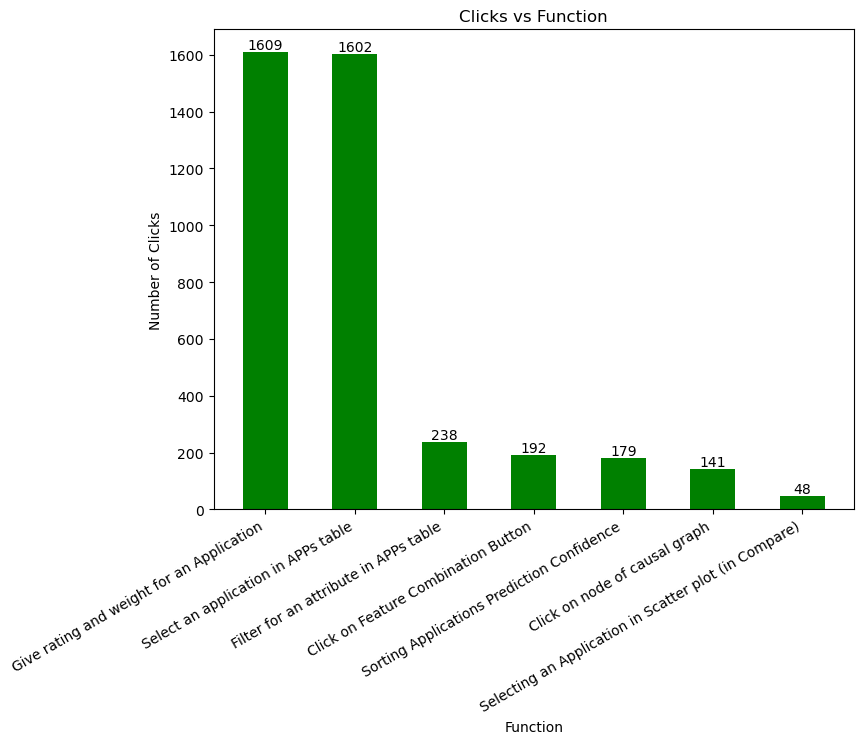

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


bars = ax.bar(each_function_df["Function"],each_function_df["Total"], width=0.5, color = "green")
ax.bar_label(bars)
plt.title("Clicks vs Function")
plt.xlabel('Function')
plt.ylabel('Number of Clicks')
fig.autofmt_xdate()
plt.show()

## How many times each application was viewed w.r.t each user

In [6]:
logs_df[logs_df["Function"] == "select_applications"]

display(logs_df[logs_df["Function"] == "select_applications"].head())
print(logs_df[logs_df["Function"] == "select_applications"]["ID"].nunique())

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
0,2,2022-12-20 14:38:33.948590,5e909231933994023e8b3c4d,106647,select_applications,NaN,106647,NaN,NaN
2,5,2022-12-20 14:39:33.335221,5e909231933994023e8b3c4d,106823,select_applications,NaN,106823,NaN,NaN
6,15,2022-12-20 14:40:03.801604,5e909231933994023e8b3c4d,106401,select_applications,NaN,106401,NaN,NaN
8,20,2022-12-20 14:41:04.203472,5e909231933994023e8b3c4d,106861,select_applications,NaN,106861,NaN,NaN
10,25,2022-12-20 14:41:15.710119,5e909231933994023e8b3c4d,100001,select_applications,NaN,100001,NaN,NaN


58


In [7]:
app_group = logs_df[logs_df["Function"] == "select_applications"].groupby(by = ["ID","App ID"])

app_count = app_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(app_count.index)):    
    data.append(
    {
        "Participant" : app_count.index[i][0],
        "App ID" : app_count.index[i][1],
        "Count": app_count.values[i]
    }
    )
    
parti_app_df = pd.DataFrame(data)
parti_app_df

,Participant,App ID,Count
0,5952a5175071bb0001ce96c7,100001,1
1,5952a5175071bb0001ce96c7,100005,0
2,5952a5175071bb0001ce96c7,100013,0
3,5952a5175071bb0001ce96c7,100028,0
4,5952a5175071bb0001ce96c7,100038,1
...,...,...,...
17105,6229dc51dff340226697778e,106810,0
17106,6229dc51dff340226697778e,106822,0
17107,6229dc51dff340226697778e,106823,0
17108,6229dc51dff340226697778e,106853,0


In [8]:
data = []

for app_id in parti_app_df["App ID"].unique():    
    data.append(
    {
        "Application" : app_id,
        "Total" : parti_app_df[parti_app_df["App ID"]== app_id ].Count.sum(),
        "Mean": round(parti_app_df[parti_app_df["App ID"]== app_id ].Count.mean(),2),
        "Std": round(parti_app_df[parti_app_df["App ID"]== app_id ].Count.std(),2),
        "Number of Participants Viewed" : parti_app_df[(parti_app_df["App ID"]== app_id) & (parti_app_df["Count"] != 0)].shape[0]
    }
    )
    
each_app_df = pd.DataFrame(data)
each_app_df

each_app_df.sort_values(by='Total', ascending=False, inplace = True)
each_app_df.fillna("NA", inplace = True)
each_app_df.reset_index(drop = True, inplace = True)
each_app_df

# each_app_df.to_csv("How many times each application was viewed w.r.t each user.csv")

,Application,Total,Mean,Std,Number of Participants Viewed
0,106647,55,0.95,0.22,55
1,106401,47,0.81,0.40,47
2,101367,39,0.67,0.47,39
3,106488,37,0.64,0.48,37
4,100241,37,0.64,0.48,37
...,...,...,...,...,...
290,103624,1,0.02,0.13,1
291,103572,1,0.02,0.13,1
292,101259,1,0.02,0.13,1
293,101287,1,0.02,0.13,1


## Which attribute was most filtered for w.r.t each participant

In [9]:
logs_df[logs_df["Function"] == "apply_refine_search"]

display(logs_df[logs_df["Function"] == "apply_refine_search"].head())
print("No.Part.:",logs_df[logs_df["Function"] == "apply_refine_search"]["ID"].nunique())

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
192,2,2022-12-20 14:35:56.166625,5fe100d9ece28c2fa6e9a5a1,0,apply_refine_search,Age,NaN,NaN,NaN
193,3,2022-12-20 14:36:42.653422,5fe100d9ece28c2fa6e9a5a1,0,apply_refine_search,Highest education level,NaN,NaN,NaN
205,47,2022-12-20 14:39:02.793457,5fe100d9ece28c2fa6e9a5a1,0,apply_refine_search,Age,>60,NaN,NaN
206,48,2022-12-20 14:39:03.511779,5fe100d9ece28c2fa6e9a5a1,0,apply_refine_search,Age,>60,NaN,NaN
208,51,2022-12-20 14:39:34.414477,5fe100d9ece28c2fa6e9a5a1,0,apply_refine_search,Age,>60,NaN,NaN


No.Part.: 44


In [10]:
attribute_group = logs_df[logs_df["Function"] == "apply_refine_search"].groupby(by = ["ID","Attribute"])

attribute_count = attribute_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(attribute_count.index)):
    
    if attribute_count.index[i][1] in list(ft_weight_dict.keys()):
        data.append(
        {
            "Participant" : attribute_count.index[i][0],
            "Attribute" : attribute_count.index[i][1],
            "Count": attribute_count.values[i]
        }
        )
    
parti_attri_df = pd.DataFrame(data)
parti_attri_df

,Participant,Attribute,Count
0,5952a5175071bb0001ce96c7,Accompanied while applying,0
1,5952a5175071bb0001ce96c7,Age,2
2,5952a5175071bb0001ce96c7,Application Day,0
3,5952a5175071bb0001ce96c7,Application Hour,0
4,5952a5175071bb0001ce96c7,Contact address located in Registration region,0
...,...,...,...
1667,6229dc51dff340226697778e,Region & City Rating,0
1668,6229dc51dff340226697778e,Region's Normalized Population,0
1669,6229dc51dff340226697778e,Region's Rating,0
1670,6229dc51dff340226697778e,Years in current employment,0


In [11]:
data = []

for attribute in list(ft_weight_dict.keys()):
    
    data.append(
    {
        "Attribute" : attribute,
        "Total" : parti_attri_df[parti_attri_df["Attribute"]== attribute ].Count.sum(),
        "Mean": round(parti_attri_df[parti_attri_df["Attribute"]== attribute ].Count.mean(),2),
        "Std": round(parti_attri_df[parti_attri_df["Attribute"]== attribute ].Count.std(),2),
        "Number of Participants Filtered" : parti_attri_df[(parti_attri_df["Attribute"]== attribute) & (parti_attri_df["Count"] != 0)].shape[0]
    }
    )
    
each_attri_df = pd.DataFrame(data)
each_attri_df

each_attri_df.sort_values(by='Total', ascending=False, inplace = True)
each_attri_df.fillna("NA", inplace = True)
each_attri_df.reset_index(drop = True, inplace = True)
each_attri_df
# each_attri_df.to_csv("Attribute was most filtered for w.r.t each participant.csv")

,Attribute,Total,Mean,Std,Number of Participants Filtered
0,Age,42,0.95,1.2,26
1,Income,30,0.68,1.65,14
2,Gender,18,0.41,0.76,14
3,Accompanied while applying,15,0.34,0.81,9
4,Owns Car,14,0.32,0.67,10
5,Owns Property,14,0.32,0.98,5
6,Occupation Type,10,0.23,0.71,6
7,Application Day,8,0.18,0.54,6
8,Years in current employment,6,0.14,0.63,3
9,Income type,6,0.14,0.55,3


## Applications_Prediction_Confidence : Ascended or Descended w.r.t each User

In [ ]:
# logs_df[logs_df["Function"] == "Applications_Prediction_Confidence"]

In [12]:
pc_group= logs_df[logs_df["Function"] == "Applications_Prediction_Confidence"].groupby(by = ["ID","Value"])

pc_count = pc_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(pc_count.index)):
    
    data.append(
    {
        "Participant" : pc_count.index[i][0],
        "PC_Value" : pc_count.index[i][1],
        "Count": pc_count.values[i]
    }
    )
    
parti_pc_df = pd.DataFrame(data)
parti_pc_df

,Participant,PC_Value,Count
0,5952a5175071bb0001ce96c7,ascend,2
1,5952a5175071bb0001ce96c7,descend,0
2,59cbe23a916c4d0001094710,ascend,2
3,59cbe23a916c4d0001094710,descend,0
4,5d66a40c141c9800016a08a2,ascend,1
5,5d66a40c141c9800016a08a2,descend,0
6,5e8a39059d97d006d0bd8439,ascend,4
7,5e8a39059d97d006d0bd8439,descend,0
8,5e909231933994023e8b3c4d,ascend,2
9,5e909231933994023e8b3c4d,descend,0


In [13]:
data = []

for pc_action in logs_df[logs_df["Function"] == "Applications_Prediction_Confidence"]["Value"].unique():
    
    data.append(
    {
        "PC_Value" : pc_action,
        "Total" : parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.sum(),
        "Mean": round(parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.mean(),2),
        "Std": round(parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.std(),2),
        "Number of Participants Clicked" : parti_pc_df[(parti_pc_df["PC_Value"]== pc_action) & (parti_pc_df["Count"] != 0)].shape[0]
    }
    )
    
each_pc_df = pd.DataFrame(data)

each_pc_df.sort_values(by='Total', ascending=False, inplace = True)
each_pc_df.fillna("NA", inplace = True)
each_pc_df.reset_index(drop = True, inplace = True)
display(each_pc_df)

,PC_Value,Total,Mean,Std,Number of Participants Clicked
0,ascend,150,5.77,9.37,26
1,descend,29,1.12,2.25,7


## How many participants selected to view a similar application?

In [14]:
p_ids_similar = logs_df[logs_df["Function"] == "similar_application"]['ID'].unique()

In [15]:
len(p_ids_similar)

19

## How many participants clicked on Feature Combinations buttons

In [16]:
logs_df[logs_df["Function"] == "Click on Feature Combination Button"]['ID'].nunique()


36

## Which attribute was most clicked on the causal graph w.r.t each participant

In [17]:
logs_df[logs_df["Function"] == "Clicked-on-Causal-Graph-Node"]

display(logs_df[logs_df["Function"] == "Clicked-on-Causal-Graph-Node"].head())
print("No. Part.:",logs_df[logs_df["Function"] == "Clicked-on-Causal-Graph-Node"]["ID"].nunique())

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
197,24,2022-12-20 14:37:41.836232,5fe100d9ece28c2fa6e9a5a1,0,Clicked-on-Causal-Graph-Node,Node Value,Number of family members,NaN,NaN
300,283,2022-12-20 14:51:50.436476,5fe100d9ece28c2fa6e9a5a1,0,Clicked-on-Causal-Graph-Node,Node Value,Application Hour,NaN,NaN
301,284,2022-12-20 14:52:47.953754,5fe100d9ece28c2fa6e9a5a1,0,Clicked-on-Causal-Graph-Node,Node Value,Installments,NaN,NaN
302,285,2022-12-20 14:52:47.961724,5fe100d9ece28c2fa6e9a5a1,0,Clicked-on-Causal-Graph-Node,Node Value,Installments,NaN,NaN
303,286,2022-12-20 14:52:47.968954,5fe100d9ece28c2fa6e9a5a1,0,Clicked-on-Causal-Graph-Node,Node Value,Installments,NaN,NaN


No. Part.: 16


In [18]:
attribute_group = logs_df[logs_df["Function"] == "Clicked-on-Causal-Graph-Node"].groupby(by = ["ID","Value"])

attribute_count = attribute_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(attribute_count.index)):
    
    if attribute_count.index[i][1] in list(ft_weight_dict.keys()):
        data.append(
        {
            "Participant" : attribute_count.index[i][0],
            "Attribute" : attribute_count.index[i][1],
            "Count": attribute_count.values[i]
        }
        )
    
parti_attri_df = pd.DataFrame(data)
parti_attri_df

,Participant,Attribute,Count
0,5d66f23706e589000157e7ec,Age,3
1,5d66f23706e589000157e7ec,Application Day,0
2,5d66f23706e589000157e7ec,Application Hour,0
3,5d66f23706e589000157e7ec,Contact address located in Registration region,0
4,5d66f23706e589000157e7ec,Contact address located in work region,1
...,...,...,...
395,6229dc51dff340226697778e,Occupation Type,0
396,6229dc51dff340226697778e,Region & City Rating,0
397,6229dc51dff340226697778e,Work address located in Registration region,1
398,6229dc51dff340226697778e,Years since changing phone,0


In [19]:
data = []

for attribute in list(ft_weight_dict.keys()):
    
    data.append(
    {
        "Attribute" : attribute,
        "Total" : parti_attri_df[parti_attri_df["Attribute"]== attribute ].Count.sum(),
        "Mean": round(parti_attri_df[parti_attri_df["Attribute"]== attribute ].Count.mean(),2),
        "Std": round(parti_attri_df[parti_attri_df["Attribute"]== attribute ].Count.std(),2),
        "Number of Participants Clicked Node" : parti_attri_df[(parti_attri_df["Attribute"]== attribute) & (parti_attri_df["Count"] != 0)].shape[0]
    }
    )
    
each_attri_df = pd.DataFrame(data)
each_attri_df

each_attri_df.sort_values(by='Total', ascending=False, inplace = True)
each_attri_df.fillna("NA", inplace = True)
each_attri_df.reset_index(drop = True, inplace = True)
each_attri_df
# each_attri_df.to_csv("Attribute was most clicked on causal graph w.r.t each participant.csv")

,Attribute,Total,Mean,Std,Number of Participants Clicked Node
0,Number of family members,23,1.44,4.46,5
1,Installments,22,1.38,3.77,4
2,Number of times social circle defaulted on loa...,13,0.81,3.25,1
3,Loan Credit amount,12,0.75,2.74,2
4,Application Hour,12,0.75,2.08,3
5,Housing situation,9,0.56,2.25,1
6,Number of times social circle at default risk ...,7,0.44,1.75,1
7,Years since changing registration,6,0.38,1.26,2
8,Occupation Type,5,0.31,1.25,1
9,Application Day,4,0.25,0.77,2


# Analysis of Feedback

## How many applications were rated as fair/unfair w.r.t each participant

In [20]:
rating_group= feedback_df[feedback_df["Function"] == "select_reject_application"].groupby(by = ["ID","Attribute"])

rating_count = rating_group.size().unstack(fill_value=0).stack()


data = []

for i in range(0,len(rating_count.index)):
    
    data.append(
    {
        "Participant" : rating_count.index[i][0],
        "Rating" : rating_count.index[i][1],
        "Count": rating_count.values[i]
    }
    )
    
parti_rating_df = pd.DataFrame(data)
parti_rating_df

,Participant,Rating,Count
0,5952a5175071bb0001ce96c7,fair,7
1,5952a5175071bb0001ce96c7,unfair,4
2,59cbe23a916c4d0001094710,fair,37
3,59cbe23a916c4d0001094710,unfair,21
4,5c48be0496d59b000183e68d,fair,4
...,...,...,...
111,61687ebcd2a35ffb762d1928,unfair,3
112,616db113a87ceedca7fbf94a,fair,5
113,616db113a87ceedca7fbf94a,unfair,9
114,6229dc51dff340226697778e,fair,0


In [21]:
data = []

for rating in parti_rating_df["Rating"].unique():
    
    data.append(
    {
        "Rating" : rating,
        "Total" : parti_rating_df[parti_rating_df["Rating"]== rating ].Count.sum(),
        "Mean": round(parti_rating_df[parti_rating_df["Rating"]== rating ].Count.mean(),2),
        "Std": round(parti_rating_df[parti_rating_df["Rating"]== rating ].Count.std(),2),
        "Number of Participants Clicked" : parti_rating_df[(parti_rating_df["Rating"]== rating) & (parti_rating_df["Count"] != 0)].shape[0]

    }
    )
    
each_rating_df = pd.DataFrame(data)

each_rating_df.sort_values(by='Total', ascending=False, inplace = True)
each_rating_df.fillna("NA", inplace = True)
each_rating_df.reset_index(drop = True, inplace = True)
each_rating_df
# each_rating_df.to_csv("select_reject_application.csv")

,Rating,Total,Mean,Std,Number of Participants Clicked
0,fair,998,17.21,16.89,55
1,unfair,556,9.59,10.66,56


## How often participants gave unfair labels w.r.t each participant

In [22]:
parti_rating_df2 = parti_rating_df[parti_rating_df['Rating']=='unfair']
data = []

for participant in parti_rating_df2["Participant"].unique():
    
    data.append(
    {
        "Participant" : participant,
        "Total_unfair_Ratings" : parti_rating_df2[parti_rating_df2["Participant"]== participant].Count.sum(),
        # "Mean": round(parti_rating_df[parti_rating_df["Participant"]== participant].Count.mean(),2),
        # "Std": round(parti_rating_df[parti_rating_df["Participant"]== participant].Count.std(),2)
    }
    )    
    
each_participant_rating_df = pd.DataFrame(data)
each_participant_rating_df.sort_values(by='Total_unfair_Ratings', ascending=False, inplace = True)
each_participant_rating_df.fillna("NA", inplace = True)
each_participant_rating_df.reset_index(drop = True, inplace = True)
each_participant_rating_df
# each_participant_rating_df.to_csv("How often participants gave unfair labels w.r.t each participant.csv")

## How often participants suggested weight changes w.r.t each participant

In [52]:
feedback_group = feedback_df[(feedback_df["Function"] == "select_reject_application")]
feedback_group = pd.DataFrame(feedback_group)
for idx in feedback_group.index:
    feedback_group.at[idx,"Value"] = str(feedback_group.loc[idx]["Value"])

In [53]:
labels_with_weights_all = feedback_group.loc[[idx  for idx in feedback_group.index if feedback_group.loc[idx]['Value']!=[]]]
# labels_with_weights_all = feedback_group[[True if isinstance(val,str) and val!="[]" else False for val in feedback_group["Value"]]]
labels_with_weights_unfair =labels_with_weights_all[labels_with_weights_all['Attribute']=='unfair']
labels_with_weights_ids= labels_with_weights_unfair['ID']

labels_without_weights_all = feedback_group.loc[[idx  for idx in feedback_group.index if feedback_group.loc[idx]['Value']==[]]]
# labels_without_weights_all = feedback_group[[True if isinstance(val,str) and val=="[]" else False for val in feedback_group["Value"]]]
labels_without_weights_unfair = labels_without_weights_all[labels_without_weights_all['Attribute']=='unfair']
labels_without_weights_ids = labels_without_weights_all['ID']


In [54]:
participants_weight_group= feedback_group.groupby(by = ["ID","Value"])

participant_count = participants_weight_group.size().unstack(fill_value=0).stack()

data = []
for i in range(0,len(participant_count.index)):    
    # if participant_count.index[i][1] in feedback_df[(feedback_df["Function"] == "OKBUTTON_CLICKED_DECIDE_MODAL_Applications_List") & (feedback_df["Value"] != "[]")]["Value"].unique():
    if participant_count.index[i][1] in labels_with_weights_all["Value"].unique():    
        data.append(
        {
            "Participant" : participant_count.index[i][0],
            "Weight" : participant_count.index[i][1],
            "Count": participant_count.values[i]
        }
        )
    
participant_weight_df = pd.DataFrame(data)
participant_weight_df

,Participant,Weight,Count
0,5952a5175071bb0001ce96c7,[],0
1,5952a5175071bb0001ce96c7,"[{'attribute': ""Region's Rating"", 'value': '0'...",0
2,5952a5175071bb0001ce96c7,"[{'attribute': 'Accompanied while applying', '...",0
3,5952a5175071bb0001ce96c7,"[{'attribute': 'Accompanied while applying', '...",0
4,5952a5175071bb0001ce96c7,"[{'attribute': 'Age', 'value': '0.025'}]",0
...,...,...,...
18091,6229dc51dff340226697778e,[{'attribute': 'Years since changing identity...,0
18092,6229dc51dff340226697778e,"[{'attribute': 'Years since changing phone', '...",0
18093,6229dc51dff340226697778e,[{'attribute': 'Years since changing registrat...,0
18094,6229dc51dff340226697778e,[{'attribute': 'Years since changing registrat...,0


In [55]:
data = []

for participant in participant_weight_df["Participant"].unique():
    
    data.append(
    {
        "Participant" : participant,
        "Total_Weight_Changes" : participant_weight_df[participant_weight_df["Participant"]== participant ].Count.sum(),
    }
    )
    
    
each_participant_weight_df = pd.DataFrame(data)

each_participant_weight_df.sort_values(by='Total_Weight_Changes', ascending=False, inplace = True)
each_participant_weight_df.fillna("NA", inplace = True)
each_participant_weight_df.reset_index(drop = True, inplace = True)
each_participant_weight_df
# each_participant_weight_df.to_csv("How often participants suggested weight changes w.r.t each participant.csv")

# Can't delete these entries because the participant is labeling different applications in these entries.

,Participant,Total_Weight_Changes
0,60dc5726c777d9a0e550d1ca,102
1,5d66a40c141c9800016a08a2,102
2,5e909231933994023e8b3c4d,94
3,6033acf84fec17043ffef374,78
4,613a98d6fcbac0ce210ec3e6,58
5,59cbe23a916c4d0001094710,58
6,5c69824b98f65b0001353794,57
7,61065060bc55a8b70bc64d05,52
8,5f28221bb87bb70bb9731f2c,49
9,608aa18a3c2dfd212a1a77a9,46


## How many participants provided feedback for the same application more than once

In [26]:
feedback_group = feedback_df[feedback_df["Function"] == "select_reject_application"]
participants_checked_app_multiple_times=[]
for part in feedback_group['ID'].unique():
    part_feedback = feedback_group[feedback_group["ID"]== part]
    if len(part_feedback)> len(part_feedback['App ID'].unique()):
        participants_checked_app_multiple_times.append(part)
len(participants_checked_app_multiple_times)

36

## How many participants suggested a weight change for each attribute and average weight percentage change of weight

In [3]:
for idx in feedback_df.index:
    value = feedback_df.loc[idx]['Value']
    if value == []:
        feedback_df.at[idx,'Value'] = {}
    else:
        transf_value = {}
        for el in value:
            transf_value[el['attribute']] = el['value']
        feedback_df.at[idx,'Value'] = transf_value
feedback_df

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
3,8,2022-12-20 14:39:40.335007,5e909231933994023e8b3c4d,106823,select_reject_application,fair,{},0.0,0.0
5,13,2022-12-20 14:39:53.711255,5e909231933994023e8b3c4d,106647,select_reject_application,unfair,{},0.0,0.0
7,18,2022-12-20 14:40:32.725726,5e909231933994023e8b3c4d,106401,select_reject_application,unfair,{},0.0,0.0
9,22,2022-12-20 14:41:09.721315,5e909231933994023e8b3c4d,106861,select_reject_application,unfair,{},0.0,0.0
11,27,2022-12-20 14:41:23.548989,5e909231933994023e8b3c4d,100001,select_reject_application,fair,{},0.0,0.0
...,...,...,...,...,...,...,...,...,...
3992,94,2022-12-20 16:50:41.065143,5d66f23706e589000157e7ec,100241,select_reject_application,fair,{'Number of times social circle defaulted on l...,0.0,0.0
3994,111,2022-12-20 16:52:09.799066,5d66f23706e589000157e7ec,106802,select_reject_application,fair,{'Number of times social circle defaulted on l...,0.0,0.0
3996,131,2022-12-20 16:53:28.748659,5d66f23706e589000157e7ec,105035,select_reject_application,fair,{'Number of times social circle at default ris...,0.0,0.0
3998,150,2022-12-20 16:54:36.783552,5d66f23706e589000157e7ec,104860,select_reject_application,fair,"{'Gender': '0', 'Income': '0.054', 'Applicatio...",0.0,0.0


In [4]:
fdbck_with_weights = feedback_df[[True if len(val) else False for val in feedback_df["Value"]]]

feature_weights_dict = {}
for i in range(49):
    feature_weights_dict[applications_df['ft_name_'+str(i)].tolist()[0]] = applications_df['ft_weight_'+str(i)].tolist()[0]
    
total_clickcs_per_attr ={}
number_part_per_attr = {}
part_appid_weight_ch_dict = {}
for idx in fdbck_with_weights.index:
    ch_weights = fdbck_with_weights.loc[idx]['Value']
    for attr in ch_weights:
        if attr not in total_clickcs_per_attr:
            total_clickcs_per_attr[attr] = 0
        if attr not in number_part_per_attr:
            number_part_per_attr[attr] = []
        if fdbck_with_weights.loc[idx]['ID'] not in part_appid_weight_ch_dict:
            part_appid_weight_ch_dict[fdbck_with_weights.loc[idx]['ID']] = {}
        if fdbck_with_weights.loc[idx]['App ID'] not in part_appid_weight_ch_dict[fdbck_with_weights.loc[idx]['ID']]:
             part_appid_weight_ch_dict[fdbck_with_weights.loc[idx]['ID']][fdbck_with_weights.loc[idx]['App ID']] = {}
        if attr not in part_appid_weight_ch_dict[fdbck_with_weights.loc[idx]['ID']][fdbck_with_weights.loc[idx]['App ID']]:
            part_appid_weight_ch_dict[fdbck_with_weights.loc[idx]['ID']][fdbck_with_weights.loc[idx]['App ID']][attr] = None
        part_appid_weight_ch_dict[fdbck_with_weights.loc[idx]['ID']][fdbck_with_weights.loc[idx]['App ID']][attr] = float(ch_weights[attr]) - feature_weights_dict[attr]
        if fdbck_with_weights.loc[idx]['ID'] not in number_part_per_attr[attr]:
            number_part_per_attr[attr].append(fdbck_with_weights.loc[idx]['ID'])
        total_clickcs_per_attr[attr] = total_clickcs_per_attr[attr] + 1
for attr in number_part_per_attr:
    number_part_per_attr[attr] = len(number_part_per_attr[attr])

av_weight_ch_dict = {}
for part in part_appid_weight_ch_dict:
    for appid in part_appid_weight_ch_dict[part]:
        for attr in part_appid_weight_ch_dict[part][appid]:
            if attr not in av_weight_ch_dict:
                av_weight_ch_dict[attr] = []
            av_weight_ch_dict[attr].append(part_appid_weight_ch_dict[part][appid][attr])
for attr in av_weight_ch_dict:
    av_weight_ch_dict[attr] = sum(av_weight_ch_dict[attr])/len(av_weight_ch_dict[attr]) 
    av_weight_ch_dict[attr] = (av_weight_ch_dict[attr]/feature_weights_dict[attr])*100 if feature_weights_dict[attr] else np.inf
    
data = []
for attr in total_clickcs_per_attr:
    data.append({'attribute':attr, 
                 # 'Total_Weight_Changes':total_clickcs_per_attr[attr],                 
                 'Number of participants clicked':number_part_per_attr[attr],
                'Av. Perc. Weight Ch. %':av_weight_ch_dict[attr]})

weight_changes_df = pd.DataFrame(data)
weight_changes_df.sort_values(by='Number of participants clicked', ascending=False, inplace = True)
weight_changes_df.fillna("NA", inplace = True)
weight_changes_df.reset_index(drop = True, inplace = True)
weight_changes_df
weight_changes_df.to_csv("How many participants suggested a weight change for each attribute and average weight percentage change of weight.csv")

## How  many times an application was rated by Users w.r.t each participant

In [7]:
parti_app_rating_group= feedback_df.groupby(by = ["ID","App ID","Attribute"])

parti_app_rating_count = parti_app_rating_group.size().unstack(fill_value=0).stack()

data = []

app_id_list = feedback_df["App ID"].unique().tolist()
# app_id_list.remove(0)

for i in range(0,len(parti_app_rating_count.index)):
    if (parti_app_rating_count.index[i][1] in app_id_list) and (parti_app_rating_count.index[i][2] in feedback_df[feedback_df["Function"] == "select_reject_application"]["Attribute"].unique().tolist()):

        data.append(
        {
            "Participant" : parti_app_rating_count.index[i][0],
            "Application_Label" : (parti_app_rating_count.index[i][1],parti_app_rating_count.index[i][2]) ,
            "Application" : parti_app_rating_count.index[i][1],
            "Label" : parti_app_rating_count.index[i][2],
            "Count": parti_app_rating_count.values[i]
        }
        )
    
parti_app_rating_df = pd.DataFrame(data)
parti_app_rating_df.head(5)

,Participant,Application_Label,Application,Label,Count
0,5952a5175071bb0001ce96c7,"(100001, fair)",100001,fair,1
1,5952a5175071bb0001ce96c7,"(100001, unfair)",100001,unfair,0
2,5952a5175071bb0001ce96c7,"(100184, fair)",100184,fair,1
3,5952a5175071bb0001ce96c7,"(100184, unfair)",100184,unfair,0
4,5952a5175071bb0001ce96c7,"(100312, fair)",100312,fair,0


In [10]:
data = []

for app_label in parti_app_rating_df["Application_Label"].unique():
    
    data.append(
    {
        "App_Label" : app_label,
        "Total_Ratings" : parti_app_rating_df[parti_app_rating_df["Application_Label"]== app_label].Count.sum(),
        "Mean": round(parti_app_rating_df[parti_app_rating_df["Application_Label"]== app_label].Count.mean(),2),
        "Std": round(parti_app_rating_df[parti_app_rating_df["Application_Label"]== app_label].Count.std(),2),
        "Number of Participants Labeled": parti_app_rating_df[(parti_app_rating_df["Application_Label"]== app_label) & (parti_app_rating_df["Count"] != 0)].shape[0]}
    )
    
    
    
each_participant_app_rating_df = pd.DataFrame(data)

each_participant_app_rating_df.sort_values(by='Total_Ratings', ascending=False, inplace = True)
each_participant_app_rating_df.fillna(0, inplace = True)
each_participant_app_rating_df.reset_index(drop = True, inplace = True)

applications_list = []
label_list = []
for i in range(0,len(each_participant_app_rating_df)):
    applications_list.append(each_participant_app_rating_df["App_Label"][i][0])
    label_list.append(each_participant_app_rating_df["App_Label"][i][1])

each_participant_app_rating_df["Application"] = applications_list
each_participant_app_rating_df['Label'] = label_list
each_participant_app_rating_df = each_participant_app_rating_df.loc[:, ["Application","Label","Total_Ratings","Mean","Std","Number of Participants Labeled"]]

each_participant_app_rating_df.sort_values(by='Application', ascending=True, inplace = True)
each_participant_app_rating_df.reset_index(drop = True, inplace = True)

for index in each_participant_app_rating_df.index: 
    app_id = each_participant_app_rating_df.loc[index,"Application"]
    each_participant_app_rating_df.loc[index,"Predicted_decision"] = df[app_id]["Predicted_decision"]
    each_participant_app_rating_df.loc[index,"Prediction_Confidence_Accepted"] = df[app_id]["Prediction_Confidence_Accepted"]

each_participant_app_rating_df
#each_participant_app_rating_df.to_csv("How  many times an application was rated by Users w.r.t each participant.csv")

,Application,Label,Total_Ratings,Mean,Std,Number of Participants Labeled,Predicted_decision,Prediction_Confidence_Accepted
0,100001,unfair,8,0.26,0.44,8,Accepted,83.560
1,100001,fair,27,0.87,0.50,25,Accepted,83.560
2,100005,unfair,10,0.36,0.56,9,Accepted,57.415
3,100005,fair,22,0.79,0.50,21,Accepted,57.415
4,100013,fair,26,0.87,0.35,26,Accepted,98.342
...,...,...,...,...,...,...,...,...
559,106823,fair,2,1.00,0.00,2,Accepted,94.027
560,106853,fair,0,0.00,0.00,0,Rejected,26.817
561,106853,unfair,1,1.00,0.00,1,Rejected,26.817
562,106861,unfair,2,1.00,0.00,2,Rejected,48.685
